[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/compmec/beam1D/blob/main/examples/traction.ipynb)

# Bridge

# Implementation

In [223]:
try:
    import compmec.strct
except ModuleNotFoundError:
    print("Module not found. Installing it")
    !pip install compmec-strct
    import compmec.strct

The initial values

In [224]:
import numpy as np
np.set_printoptions(precision=3, suppress=True) # To have a clean print
L = 1
E = 4/np.pi
nu = 0.0  # This value doesn't matter to the final answer, but it's needed
d = 2
P = 0.06

We create the material we will use

In [225]:
from compmec.strct.material import Isotropic
steel = Isotropic(E=E, nu=nu)

We create our section

In [226]:
from compmec.strct.section import Circle
circle = Circle(R=d/2, nu=nu)

We create the beam

In [227]:
from compmec.strct.beam import EulerBernoulli
points = [(0, 0, 0)]
parpoints = []
nbars = 10
h = L * np.sqrt(3)
for i in range(nbars):
    A = (i*L, 0, 0)
    B = ((i+1)*L, 0, 0)
    C = ((i+0.5)*L, h, 0)
    points.extend([B, C])
    parpoints.append([A, B])
    parpoints.append([A, C])
    parpoints.append([C, B])
for i in range(nbars-1):
    A = ((i+0.5)*L, h, 0)
    B = ((i+1.5)*L, h, 0)
    parpoints.append([A, B])
points = np.array(points)

In [228]:
bars = []
for par in parpoints:
    bar = EulerBernoulli(par)
    bar.material = steel
    bar.section = circle
    bars.append(bar)

We add the displacement vector ```U``` and the force ```F```

The values of ```U``` are

$$
U =
\begin{bmatrix}
u_{1x} & u_{1y} & u_{1z} & \theta_{1x} & \theta_{1y} & \theta_{1z} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
u_{ix} & u_{iy} & u_{iz} & \theta_{ix} & \theta_{iy} & \theta_{2z} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
u_{nx} & u_{ny} & u_{nz} & \theta_{nx} & \theta_{ny} & \theta_{nz} \\
\end{bmatrix}
$$



And the values of ```F``` are

$$
F =
\begin{bmatrix}
F_{1x} & F_{1y} & F_{1z} & M_{1x} & M_{1y} & M_{1z} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
F_{ix} & F_{iy} & F_{iz} & M_{ix} & M_{iy} & M_{2z} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
F_{nx} & F_{ny} & F_{nz} & M_{nx} & M_{ny} & M_{nz} \\
\end{bmatrix}
$$

So, ```U[i]``` means the displacement (and rotation) of the point ```i```, and the ```F[i]``` is the force applied in the node ```i```

In [229]:
n = len(points)  # number of points
U = np.empty((n, 6), dtype="object")
F = np.zeros((n, 6))

We add the boundary conditions. 

For that, we only know that at point $A$ (index ```0```), $u_{x}$ is fixed.

So, ```U``` is like

$$
U
= \begin{bmatrix}
0 & u_{Ay} & u_{Az} & \theta_{Ax} & \theta_{Ay} & \theta_{Az} \\
u_{Bx} & u_{By} & u_{Bz} & \theta_{Bx} & \theta_{By} & \theta_{Bz} \\ 
\end{bmatrix}
$$

In [230]:
def index_point(p):
    distsquare = [np.sum((p-pi)**2) for pi in points]
    ind = np.where(distsquare == np.min(distsquare))
    return ind[0][0]

In [231]:
indA = index_point((0, 0, 0))
indB = index_point((nbars*L, 0, 0))
U[indA, :] = 0
U[indB, :] = 0

In [232]:
print("U = ")
print(U)

U = 
[[0 0 0 0 0 0]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [None None None None None None]
 [0 0 0 0 0 0]
 [None None None None None None]]


We add the force at the point $B$.

For that, we know that at point $B$ (index ```1```), $F_{x} = P$.

So, ```F``` is like

$$
F =
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
P & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

In [233]:
print("Points = ")
print(points)

Points = 
[[ 0.     0.     0.   ]
 [ 1.     0.     0.   ]
 [ 0.5    1.732  0.   ]
 [ 2.     0.     0.   ]
 [ 1.5    1.732  0.   ]
 [ 3.     0.     0.   ]
 [ 2.5    1.732  0.   ]
 [ 4.     0.     0.   ]
 [ 3.5    1.732  0.   ]
 [ 5.     0.     0.   ]
 [ 4.5    1.732  0.   ]
 [ 6.     0.     0.   ]
 [ 5.5    1.732  0.   ]
 [ 7.     0.     0.   ]
 [ 6.5    1.732  0.   ]
 [ 8.     0.     0.   ]
 [ 7.5    1.732  0.   ]
 [ 9.     0.     0.   ]
 [ 8.5    1.732  0.   ]
 [10.     0.     0.   ]
 [ 9.5    1.732  0.   ]]


In [234]:
for i in range(nbars):
    Pb = ((i+0.5)*L, h, 0)
    ind = index_point(Pb)
    print("ind = ", ind)
    F[ind, 1] = -P

ind =  2
ind =  4
ind =  6
ind =  8
ind =  10
ind =  12
ind =  14
ind =  16
ind =  18
ind =  20


In [235]:
print("F = ")
print(F)

F = 
[[ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.02  0.    0.    0.    0.  ]]


In [236]:
Kexp = np.zeros((n, 6, n, 6), dtype="float64")
for w, bar in enumerate(bars):
    K = bar.stiffness_matrix()
    ind0 = index_point(bar._p0)
    ind1 = index_point(bar._p1)
    Kexp[ind0, :, ind0, :] += K[0, :, 0, :]
    Kexp[ind0, :, ind1, :] += K[0, :, 1, :]
    Kexp[ind1, :, ind0, :] += K[1, :, 0, :]
    Kexp[ind1, :, ind1, :] += K[1, :, 1, :]
print("Kexp = ")
print(Kexp.reshape((6*n, 6*n)))

Kexp = 
[[ 6.061  0.045  0.    ...  0.     0.     0.   ]
 [ 0.045 14.206  0.    ...  0.     0.     0.   ]
 [ 0.     0.    14.048 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  5.182  0.     0.   ]
 [ 0.     0.     0.    ...  0.     5.365  0.   ]
 [ 0.     0.     0.    ...  0.     0.     8.438]]


Now we solve:

In [237]:
from compmec.strct.solver import solve
U, F = solve(Kexp, F, U)
print("U = ")
print(U)
print("F = ")
print(F)

U = 
[[ 0.     0.     0.     0.     0.     0.   ]
 [-0.012 -0.023  0.     0.     0.    -0.033]
 [ 0.036 -0.016  0.     0.     0.    -0.03 ]
 [-0.016 -0.061  0.     0.     0.    -0.034]
 [ 0.037 -0.048  0.     0.     0.    -0.032]
 [-0.014 -0.093  0.     0.     0.    -0.026]
 [ 0.031 -0.081  0.     0.     0.    -0.029]
 [-0.008 -0.115  0.     0.     0.    -0.014]
 [ 0.021 -0.108  0.     0.     0.    -0.02 ]
 [ 0.    -0.122  0.     0.     0.     0.   ]
 [ 0.007 -0.123  0.     0.     0.    -0.007]
 [ 0.008 -0.115  0.     0.     0.     0.014]
 [-0.007 -0.123  0.     0.     0.     0.007]
 [ 0.014 -0.093  0.     0.     0.     0.026]
 [-0.021 -0.108  0.     0.     0.     0.02 ]
 [ 0.016 -0.061  0.     0.     0.     0.034]
 [-0.031 -0.081  0.     0.     0.     0.029]
 [ 0.012 -0.023  0.     0.     0.     0.033]
 [-0.037 -0.048  0.     0.     0.     0.032]
 [ 0.     0.     0.     0.     0.     0.   ]
 [-0.036 -0.016  0.     0.     0.     0.03 ]]
F = 
[[ 0.029  0.1    0.     0.     0.     0.112]

The expected value of the equation 

$$
u(x) = \dfrac{4PL}{\pi E d^2} \cdot \dfrac{x}{L}
$$

at $x = L$ and with the given data, gives us 

$$
u(L) = \dfrac{4 \cdot 4 \cdot 1}{\pi \cdot \dfrac{4}{\pi} \cdot \left(2\right)^2} \cdot \dfrac{1}{1} = 1
$$

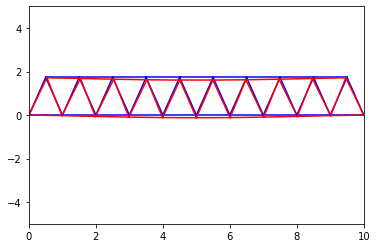

In [239]:
from matplotlib import pyplot as plt
newpoints = np.copy(points)
newpoints += U[:, :3]

for A, B in parpoints:
    plt.plot((A[0], B[0]), (A[1], B[1]), color="b")
    indA = index_point(A)
    indB = index_point(B)
    nA = np.copy(A) + U[indA, :3]
    nB = np.copy(B) + U[indB, :3]
    plt.plot((nA[0], nB[0]), (nA[1], nB[1]), color="r")

plt.xlim(0, L*nbars)
plt.ylim(-L*nbars/2, L*nbars/2)
plt.show()